In [1]:
import cv2
import tensorflow as tf
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
    
CATEGORIES = ["Verde", "Danado", "Maduro"] #convierte lo que predice en numero



# Resize
Es importante esta parte, el tamano debe ser igual al tamano de mi muestra

In [2]:
def prepare (filepath):
    size= 55
    im_arreglo=cv2.imread(filepath) # la lee y la convierte
    resize_arreglo= cv2.resize(im_arreglo, (size,size))
    return resize_arreglo.reshape(-1,size,size,3) #regresa la imagen que quiere tensoflow

In [3]:
def arreglar_prediction(prediction):
    pred=[]
    for i in range(prediction.shape[0]):
        mayor=[np.argmax(prediction[i])]
        pred.append(mayor)
    return pred



In [4]:
def graficar(confusion):
    matriz = pd.DataFrame(confusion, index = [i for i in CATEGORIES],
                  columns = [i for i in CATEGORIES])
    plt.figure(figsize = (10,7))  
    sns.heatmap(matriz, annot=True, cmap='summer')

In [5]:
def crear_matriz(ytest, prediction):
    confusion = confusion_matrix(ytest, 
                                 arreglar_prediction(prediction))
    return graficar(confusion)

In [28]:
def predecir_foto(model, path):
    p= model.predict(prepare(path))
    print("prediccion de la imagen: " , p)
    return CATEGORIES[np.argmax(p)]
    

In [7]:
pickle_in= (open ("modelo1/xtest", "rb"))
xtest=pickle.load(pickle_in)

pickle_in= (open("modelo1/ytest", "rb"))
ytest=pickle.load(pickle_in)


# Importar modelos

In [47]:
#model= tf.keras.models.load_weights("pesos.h5")
model = tf.keras.models.load_model("modelo1/Modelo2_3conv_1dense_256size.h5")
p_model= model.predict(xtest)

In [40]:
p_model

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

# Matriz de confusion

**Modelo 1**


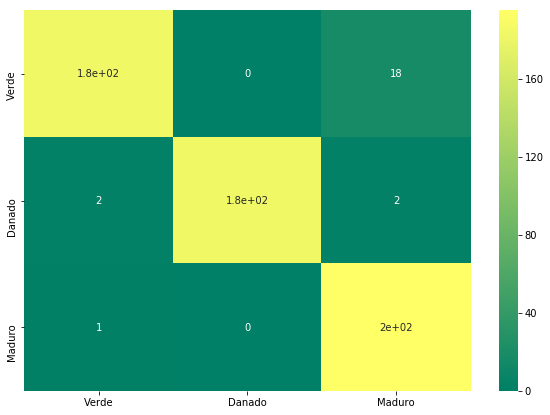

In [42]:
crear_matriz(ytest, p_model)

In [43]:
#"pruebas/danado1.jfif"
predecir_foto(model, "pruebas/verde3.jpg")

prediccion de la imagen:  [[1. 0. 0.]]


'Verde'

In [45]:
print("Porcentaje de precision: ", accuracy_score(ytest,arreglar_prediction(p_model))*100, "%")

Porcentaje de precision:  96.06837606837607 %
